In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd


Loading CIFAR-10 Dataset and Class Labels


In [2]:
from tensorflow.keras.datasets import cifar10
(train_img,train_label),(test_img,test_label)=cifar10.load_data()
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Visualizing CIFAR-10 Images with Labels

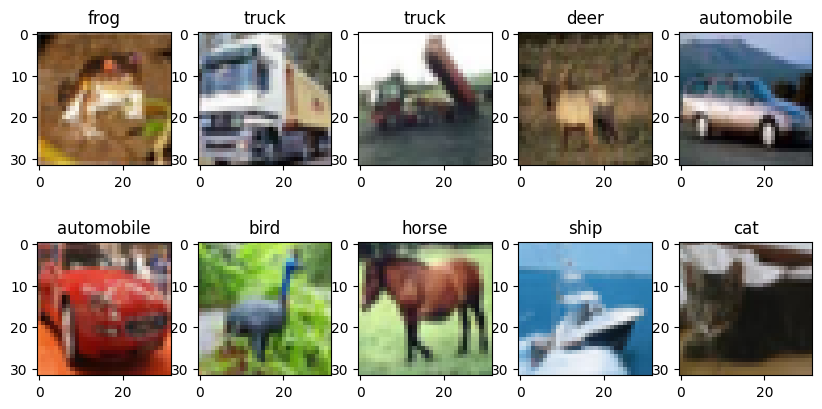

In [3]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_img[i])# No cmap specified for displaying RGB images
    plt.title(cifar_classes[train_label[i][0]])
plt.tight_layout
plt.show()


Shapes of CIFAR-10 Dataset and Labels

In [4]:
print("Shape of Training image dataset:",train_img.shape)
print("Shape of Training image label:",train_label.shape)
print("Shape of Testing image dataset:",test_img.shape)
print("Shape of Testing image label:",test_label.shape)
print("Shape of image in dataset :",train_img[0].shape)

Shape of Training image dataset: (50000, 32, 32, 3)
Shape of Training image label: (50000, 1)
Shape of Testing image dataset: (10000, 32, 32, 3)
Shape of Testing image label: (10000, 1)
Shape of image in dataset : (32, 32, 3)


Preprocessing CIFAR-10 Dataset: Normalization and One-Hot Encoding

In [5]:
train_img=train_img.astype("float32")/255
test_img=test_img.astype("float32")/255

train_img=np.reshape(train_img,(train_img.shape[0],32*32*3))
test_img=np.reshape(test_img,(test_img.shape[0],32*32*3))
from tensorflow.keras.utils import to_categorical

train_label=to_categorical(train_label,num_classes=10)
test_label=to_categorical(test_label,num_classes=10)
print(test_label[0]) #one-hot encoding


print("Shape of Training image dataset:",train_img.shape)
print("Shape of Training image label:",train_label.shape)
print("Shape of Testing image dataset:",test_img.shape)
print("Shape of Testing image label:",test_label.shape)
print("Shape of image in dataset :",train_img[0].shape)

Creating and Training a Sequential Model 

In [8]:
from keras.models import Sequential
from keras.layers import Flatten,Dense

model=Sequential()
model.add(Dense(256,activation='relu',input_dim=32*32*3))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
history=model.fit(train_img,train_label,validation_split=0.1,batch_size=64,epochs=3)
loss,accuracy=model.evaluate(test_img,test_label)

print("loss:",{loss})
print("accuracy:",{accuracy})

Epoch 1/3
704/704 [==============================] - 12s 16ms/step - loss: 1.8615 - accuracy: 0.3278 - val_loss: 1.8045 - val_accuracy: 0.3472
Epoch 2/3
704/704 [==============================] - 9s 13ms/step - loss: 1.6846 - accuracy: 0.3947 - val_loss: 1.6239 - val_accuracy: 0.4178
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 1.5633 - accuracy: 0.4419



Visualization of Training and Validation Metrics


<function matplotlib.pyplot.show(close=None, block=None)>

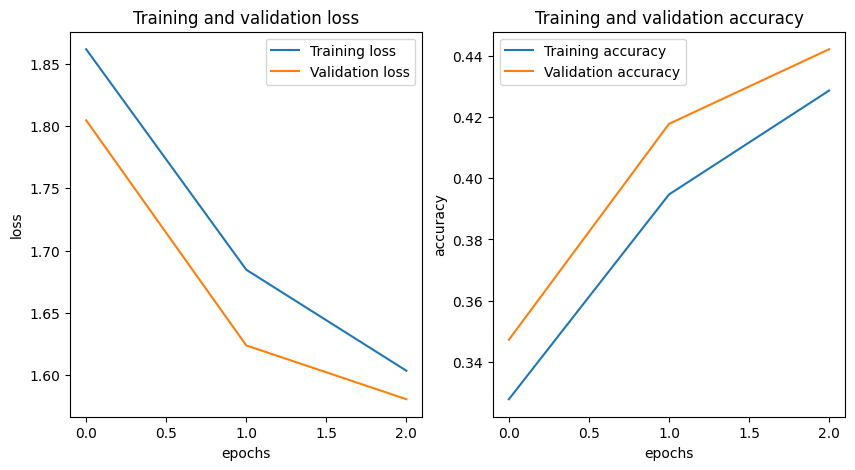

In [10]:


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history["loss"],label="Training loss")
plt.plot(history.history["val_loss"],label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"],label="Training accuracy")
plt.plot(history.history["val_accuracy"],label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show

Prediction for a Single Image

In [11]:
sample_image=test_img[10]
sample_image=np.expand_dims(sample_image,axis=0)
predictions=model.predict(sample_image)
predicted_class=np.argmax(predictions,axis=1)
print(cifar_classes[predicted_class[0]])

1/1 [==============================] - 0s 58ms/step
ship



Making Predictions on Test Dataset

In [12]:

prediction=model.predict(test_img)
prediction_classes=np.argmax(prediction,axis=1)

print(prediction)
print(prediction_classes)
for l in range(len(prediction_classes)):
    print(cifar_classes[prediction_classes[l]])

313/313 [==============================] - 0s 1ms/step
[[1.0264837e-01 9.2051640e-02 1.6669157e-01 ... 7.0330543e-03
  9.5009290e-02 8.3076358e-03]
 [2.4693865e-02 3.8060376e-01 4.1949125e-03 ... 2.9123572e-04
  1.8077587e-01 4.0743026e-01]
 [7.5168468e-02 9.4836161e-02 3.6039990e-03 ... 7.2474731e-04
  7.3249435e-01 8.9292936e-02]
 ...
 [5.1223044e-03 1.6500840e-03 1.3088505e-01 ... 5.9102844e-02
  2.8154707e-02 4.1735126e-03]
 [2.3551501e-02 2.4963809e-02 2.2388344e-01 ... 1.5834188e-02
  1.2948612e-02 2.9909179e-02]
 [1.0618894e-01 2.0205237e-02 2.0311835e-01 ... 2.8442326e-01
  1.7354283e-02 1.9614520e-02]]
[3 9 8 ... 3 2 7]
cat
truck
ship
ship
deer
frog
cat
bird
bird
automobile
ship
truck
dog
airplane
automobile
ship
dog
deer
ship
frog
deer
bird
airplane
automobile
bird
bird
deer
airplane
automobile
frog
frog
bird
bird
dog
truck
automobile
frog
automobile
truck
ship
airplane
frog
cat
deer
airplane
truck
cat
ship
deer
deer
truck
bird
frog
cat
ship
ship
dog
automobile
ship
bird
deer